# Bias Correction for Cropland Area Estimation

This notebook demonstrates the workflow for applying bias correction to cropland area estimates using the Olofsson et al. (2014) methodology. The process adjusts model-predicted cropland areas using stratified validation samples.

## Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import bias_correction as bc

In [2]:
from bias_correction.config import INPUT_DATA_DIR, load_results

# Load input data
window_gross_df = pd.read_csv(INPUT_DATA_DIR / 'cropscope_gross.csv')
window_net_df = pd.read_csv(INPUT_DATA_DIR / 'cropscope_net.csv')

# Load validation data
gp_accuracy_df = pd.read_csv(INPUT_DATA_DIR / 'great_plains_accuracy_points_gdrive.csv')
mx_accuracy_df = pd.read_csv(INPUT_DATA_DIR / 'mexico_accuracy_points_gdrive.csv')

# Load results
results = load_results(INPUT_DATA_DIR / 'corrected_cropland_area_estimates.json')

True

## Process Both Footprint Types

We'll process both the total (gross) and active cropland footprints. The process:
1. Applies bias correction separately for Great Plains and Southern regions
2. Combines results across regions
3. Provides adjusted areas with uncertainty estimates

In [3]:
# Process both footprint types
results = bc.process_footprint(
    gross_df=window_gross_df,
    net_df=window_net_df,
    gp_accuracy_df=gp_accuracy_df,
    mx_accuracy_df=mx_accuracy_df,
    gp_strata_proportions=bc.GP_STRATA_PROPORTIONS,
    mx_strata_proportions=bc.MX_STRATA_PROPORTIONS,
    gp_overlap_areas=bc.GP_OVERLAP_AREAS,
    mx_overlap_areas=bc.MX_OVERLAP_AREAS,
    years=bc.YEARS
)



## Analyze Results

Let's examine the bias-adjusted areas and their uncertainties for different regions and footprint types.

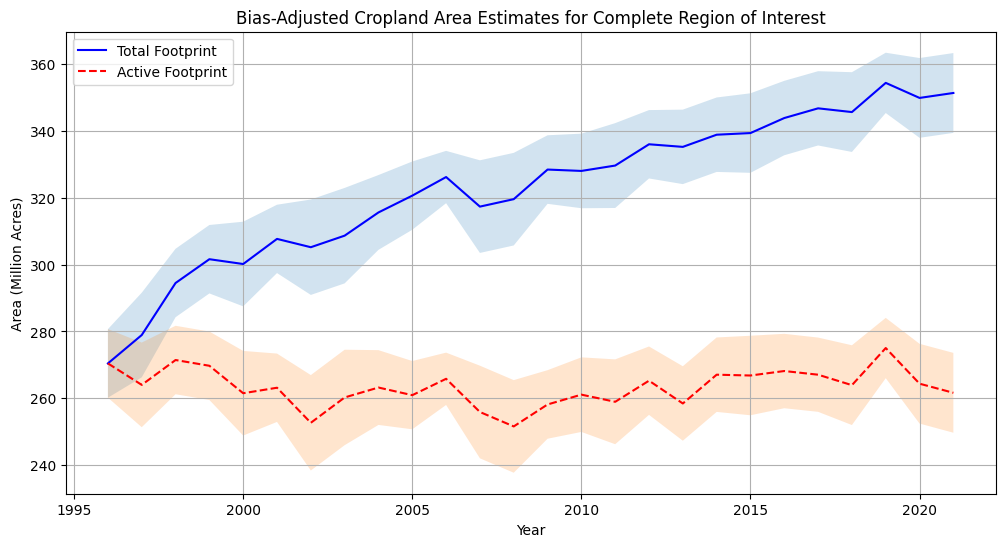

In [4]:
# Extract results for the total region
all_regions_total = results['gross']['combined']['total']
all_regions_active = results['net']['combined']['total']

# Create a simple visualization
plt.figure(figsize=(12, 6))

# Plot gross footprint
plt.plot(all_regions_total['year'], all_regions_total['adjusted'], 'b-', label='Total Footprint')
plt.fill_between(
    all_regions_total['year'],
    all_regions_total['adjusted'] - all_regions_total['se'],
    all_regions_total['adjusted'] + all_regions_total['se'],
    alpha=0.2
)

# Plot net footprint
plt.plot(all_regions_active['year'], all_regions_active['adjusted'], 'r--', label='Active Footprint')
plt.fill_between(
    all_regions_active['year'],
    all_regions_active['adjusted'] - all_regions_active['se'],
    all_regions_active['adjusted'] + all_regions_active['se'],
    alpha=0.2
)

plt.title('Bias-Adjusted Cropland Area Estimates for Complete Region of Interest')
plt.xlabel('Year')
plt.ylabel('Area (Million Acres)')
plt.legend()
plt.grid(True)
plt.show()

## Compare Original vs Adjusted Areas

Let's examine how the bias correction affected our area estimates.

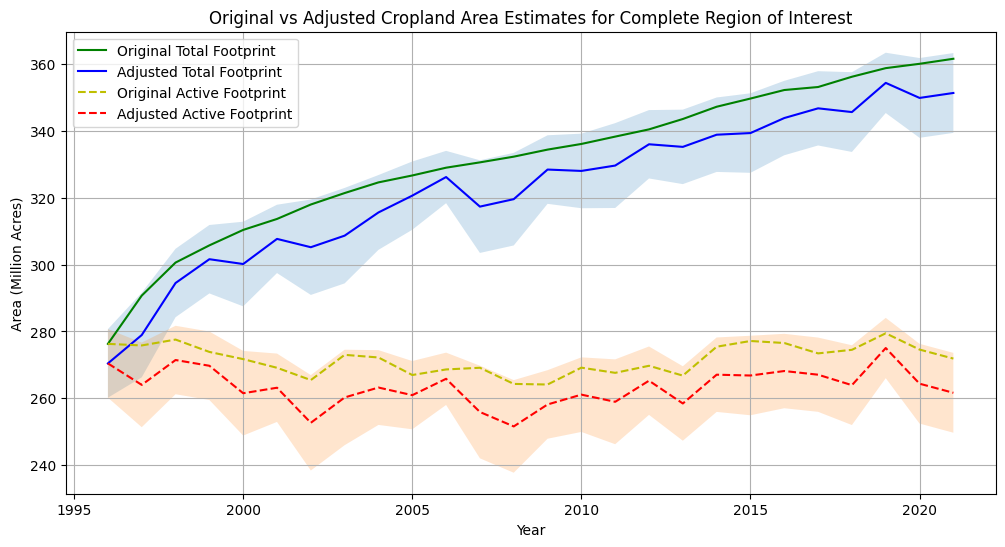

In [5]:
# Plot original and adjusted data for all_regions_total and all_regions_active

plt.figure(figsize=(12, 6))

# Plot original gross footprint
plt.plot(all_regions_total['year'], all_regions_total['observed'], 'g-', label='Original Total Footprint')

# Plot adjusted gross footprint
plt.plot(all_regions_total['year'], all_regions_total['adjusted'], 'b-', label='Adjusted Total Footprint')
plt.fill_between(
    all_regions_total['year'],
    all_regions_total['adjusted'] - all_regions_total['se'],
    all_regions_total['adjusted'] + all_regions_total['se'],
    alpha=0.2
)

# Plot original net footprint
plt.plot(all_regions_active['year'], all_regions_active['observed'], 'y--', label='Original Active Footprint')

# Plot adjusted net footprint
plt.plot(all_regions_active['year'], all_regions_active['adjusted'], 'r--', label='Adjusted Active Footprint')
plt.fill_between(
    all_regions_active['year'],
    all_regions_active['adjusted'] - all_regions_active['se'],
    all_regions_active['adjusted'] + all_regions_active['se'],
    alpha=0.2
)

plt.title('Original vs Adjusted Cropland Area Estimates for Complete Region of Interest')
plt.xlabel('Year')
plt.ylabel('Area (Million Acres)')
plt.legend()
plt.grid(True)
plt.show()


# Visualize results and create publication figure

PACKAGE_ROOT: /Users/sean.carter/Documents/Code/Landcover/bias_correction
DATA_DIR: /Users/sean.carter/Documents/Code/Landcover/bias_correction/data/misc_fig_data

Country: Full Region of Interest

Country: Canada

Country: United States of America

Country: Mexico


/Users/sean.carter/Documents/Code/Landcover/bias_correction/src/bias_correction/visualization.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


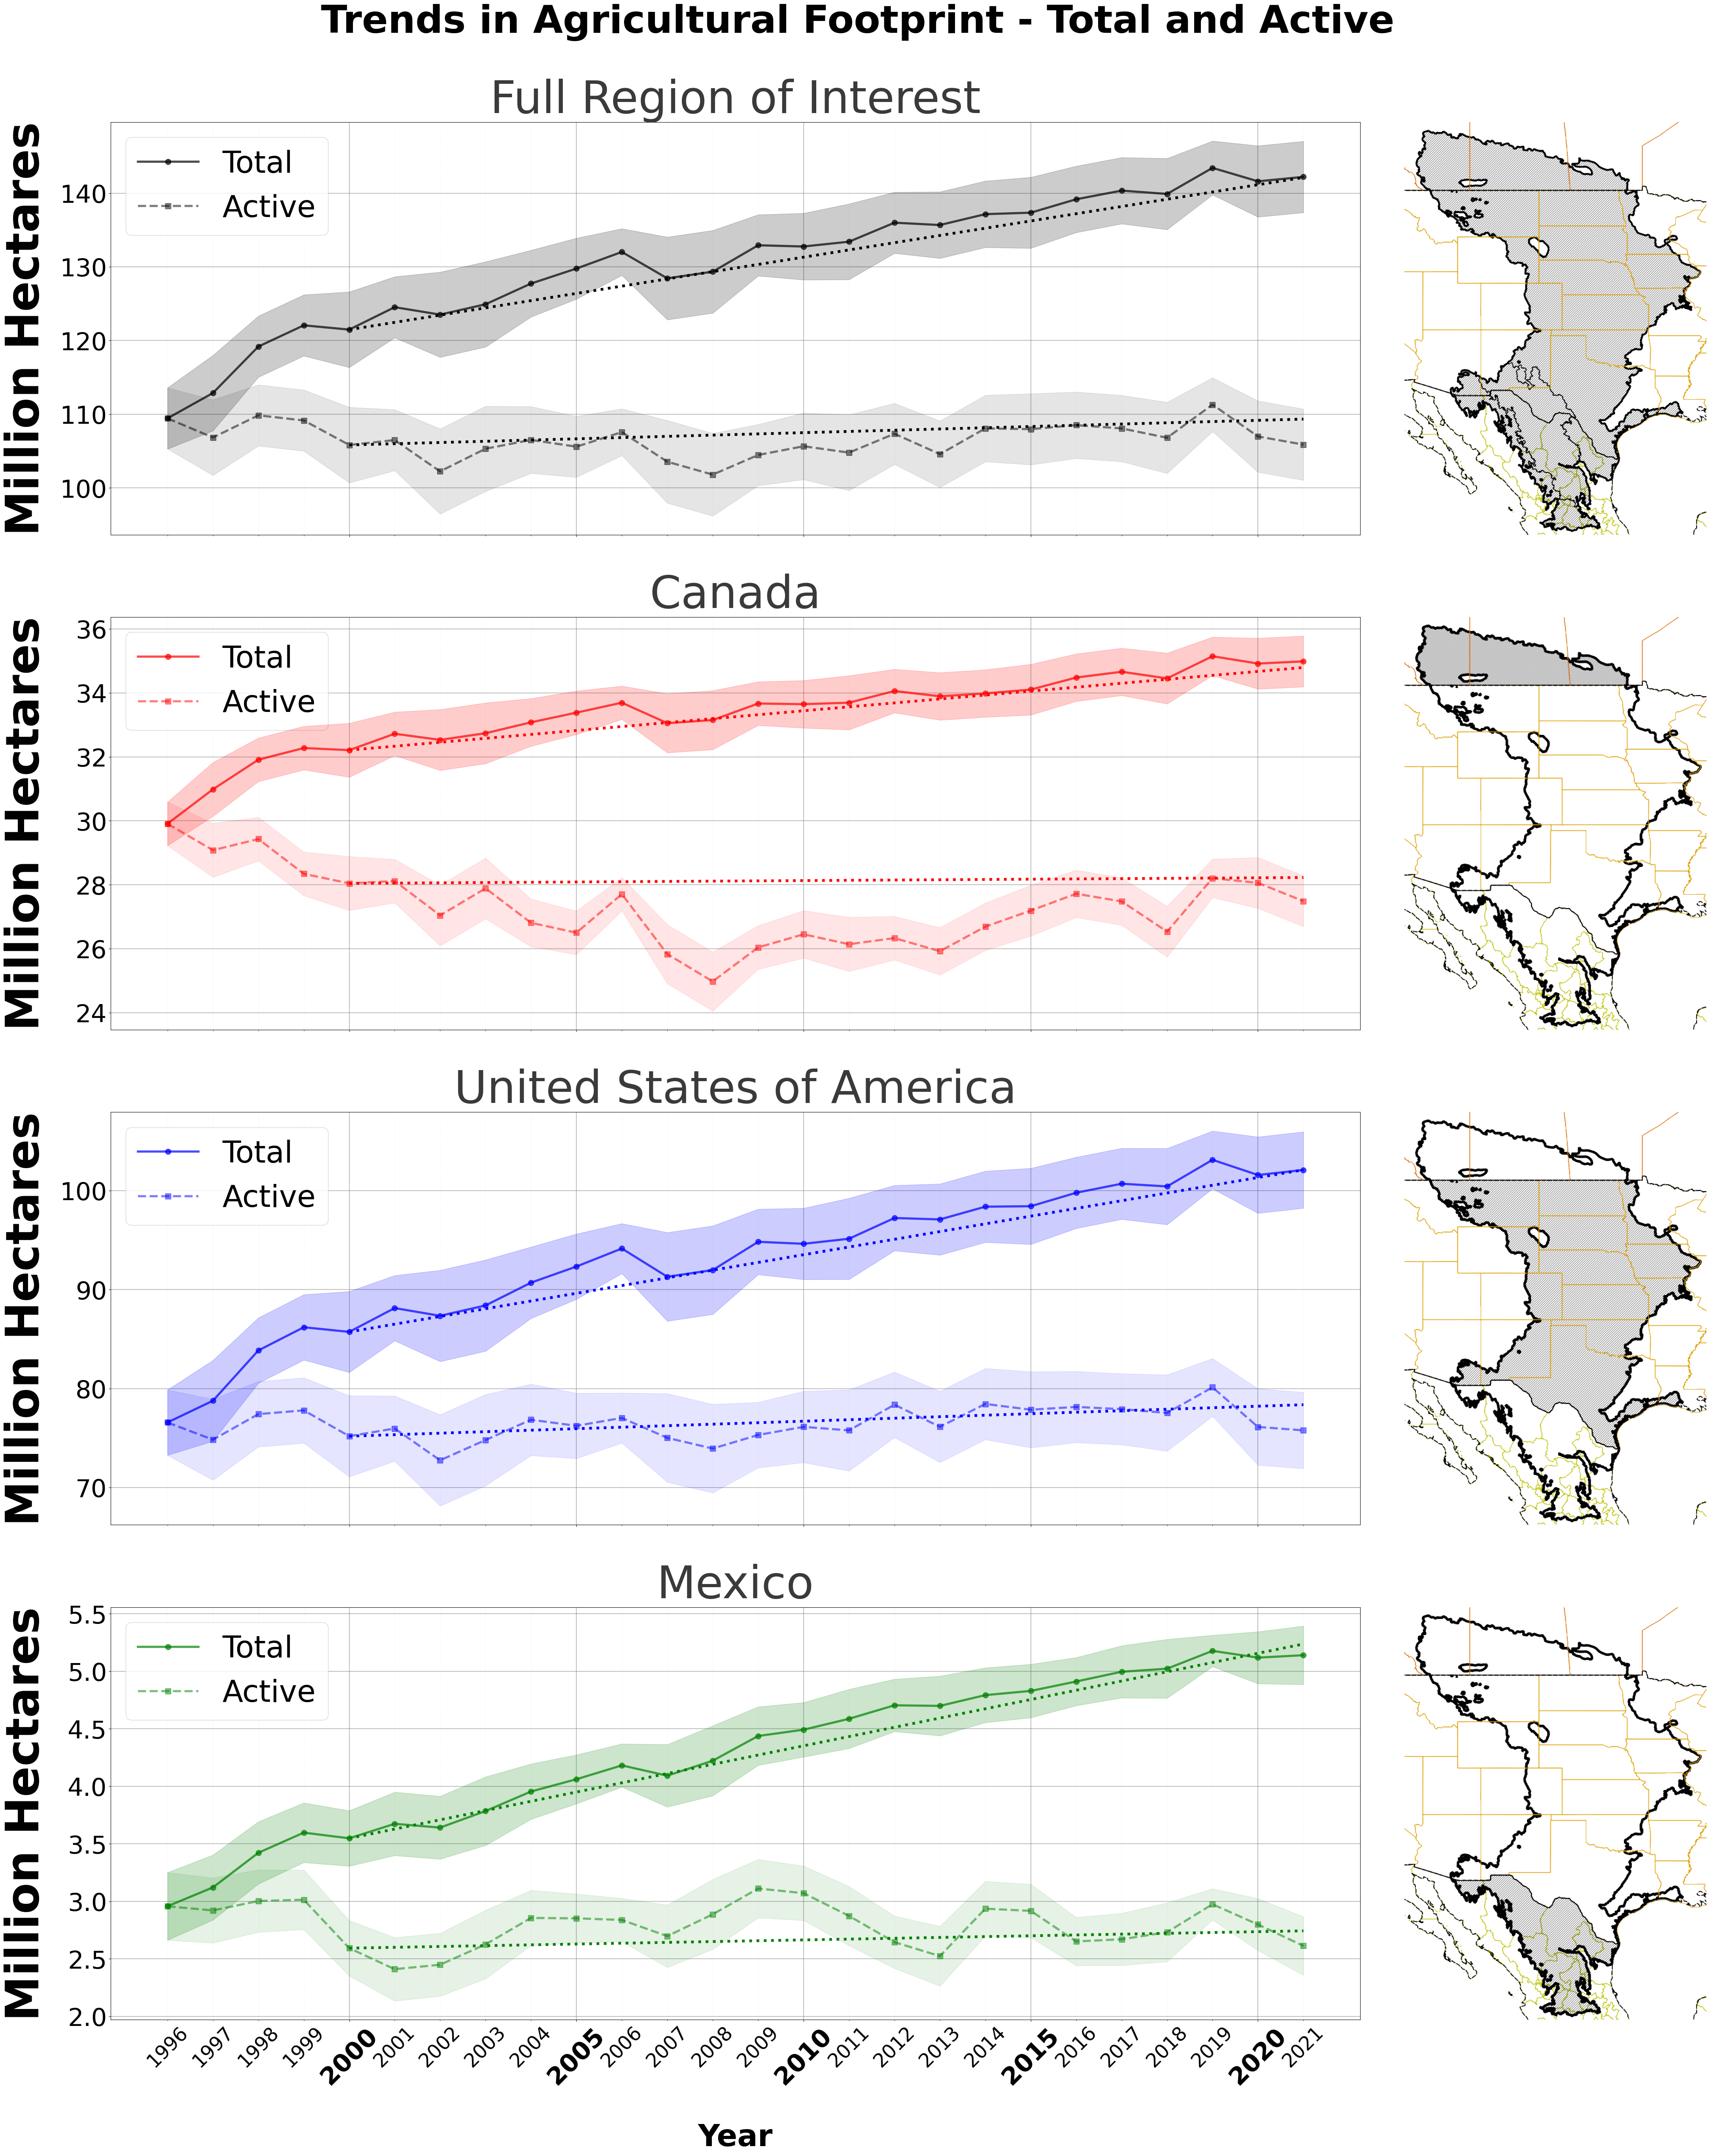

In [1]:
from bias_correction.visualization import create_multipanel_plot
from bias_correction.config import load_results

# Load results
results = load_results('corrected_cropland_area_estimates.json')

# Create figure
create_multipanel_plot(results, save_path='corrected_trends.png')